## Project Roadmap:
* Get the data.
* Take a first look (explore & visualize).
* Split into training and test sets (super important!).
* More exploration on the training set.
* Prepare the data for our ML algorithms (cleaning, scaling).
* Select and train a few models.
* Fine-tune the best model.
* Evaluate on the test set.
* Briefly touch on saving the model.

# 1. Getting Our Hands on the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the dataset
cancer = load_breast_cancer()
print(dir(cancer))
print(cancer.DESCR)
print(cancer.data)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  F

In [3]:
# Create a Pandas DataFrame
# Features are in cancer.data, target (diagnosis) is in cancer.target
# Feature names are in cancer.feature_names
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# The target in scikit-learn's dataset is often 0 for malignant and 1 for benign.
# For clarity and common convention (1 for positive class), let's map:
# Malignant -> 1
# Benign -> 0
df['diagnosis'] = (cancer.target == 0).astype(int) # 0 is malignant in original, so (cancer.target == 0) is True (1) for malignan
print("Dataset loaded successfully.")
print(f"Shape of the dataset: {df.shape}")

Dataset loaded successfully.
Shape of the dataset: (569, 31)


In [5]:
# Let's see what `cancer.target` looked like and how our `diagnosis` column is now.
# `cancer.target`: 0 means malignant, 1 means benign.
# Our `df['diagnosis']`: 1 means malignant, 0 means benign.

print("\nOriginal Scikit-learn target unique values:", np.unique(cancer.target))
print("Our 'diagnosis' column unique values:", np.unique(df['diagnosis']))
print("Counts for our 'diagnosis' column:")
print(df['diagnosis'].value_counts())


Original Scikit-learn target unique values: [0 1]
Our 'diagnosis' column unique values: [0 1]
Counts for our 'diagnosis' column:
diagnosis
0    357
1    212
Name: count, dtype: int64


# 2. Initial Data Exploration & Visualization

In [6]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter

In [7]:
print("\nDataset info (columns, data types, non-null counts):")
df.info()


Dataset info (columns, data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               5

In [8]:
print("\nStatistical summary of numerical features:")
print(df.describe())


Statistical summary of numerical features:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380      

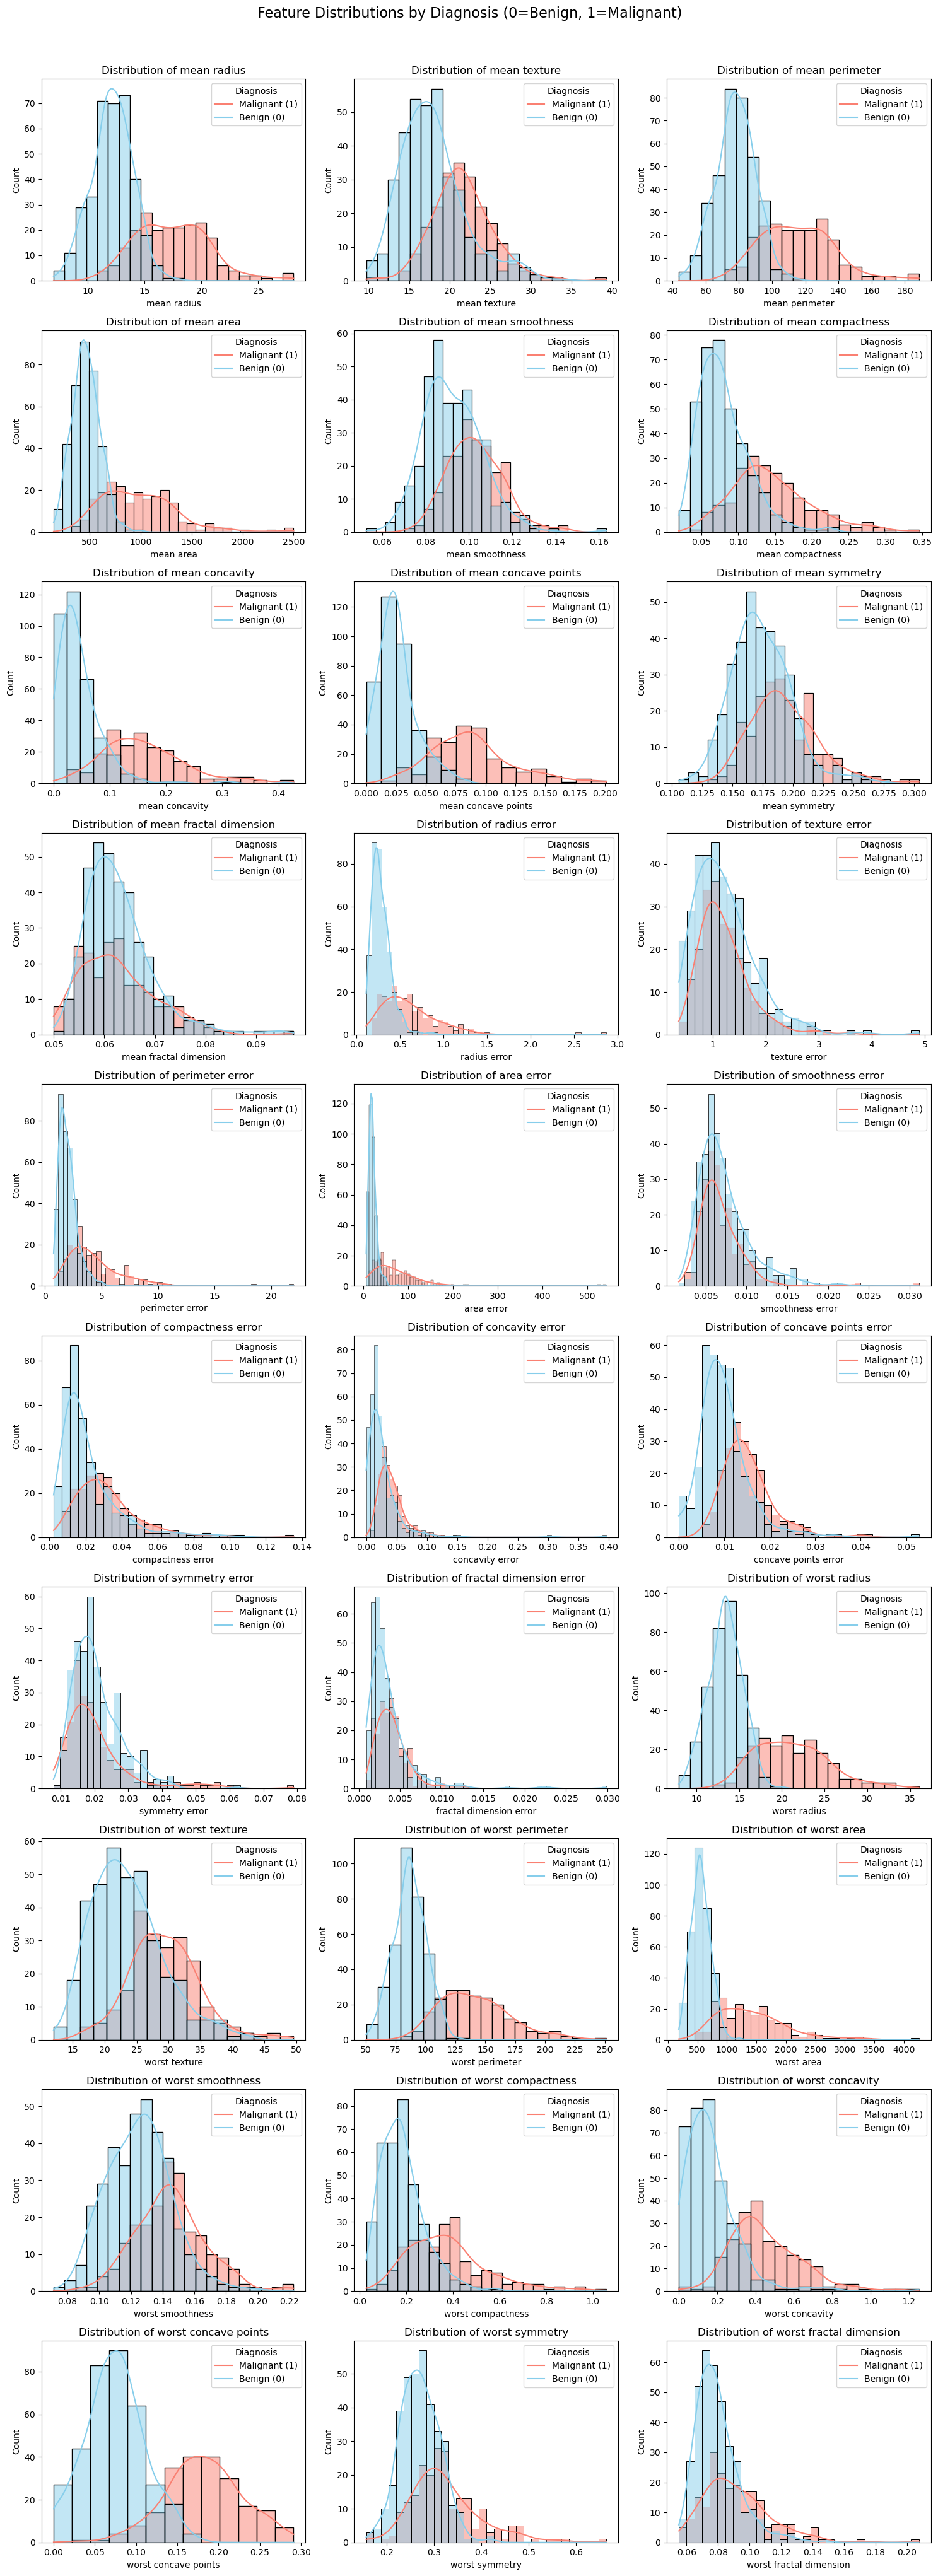

In [10]:
# # Plot histograms for a all features
numerical_features = df.drop('diagnosis', axis=1).columns # Get all feature column names
# Create histograms for all numerical features, separated by diagnosis
# We'll plot a few at a time for readability, or you can loop through all.
# Let's determine a reasonable number of rows and columns for subplots
n_features = len(numerical_features)
n_cols = 3 # Or 4, depending on preference
n_rows = (n_features + n_cols - 1) // n_cols # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten to easily iterate over axes

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, ax=axes[i], palette={0: 'skyblue', 1: 'salmon'})
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend(title='Diagnosis', labels=['Malignant (1)', 'Benign (0)']) # Adjust labels based on hue order

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Distributions by Diagnosis (0=Benign, 1=Malignant)", fontsize=16, y=1.02)
plt.show()  

The histograms above show how the values for each feature are distributed for benign (skyblue) versus malignant (salmon) tumors. Features where the two colored distributions show good separation are likely to be good predictors

# 3. Split into Training and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Stratified split
# test_size=0.2 means 20% for test, 80% for train
# random_state ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print("\nTraining set diagnosis distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set diagnosis distribution:")
print(y_test.value_counts(normalize=True)) # Should be similar to training set

Training set shape: (455, 30), Test set shape: (114, 30)

Training set diagnosis distribution:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

Test set diagnosis distribution:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


The distributions look similar, so our stratified split worked well! Now, we lock away X_test and y_test.

# 4. Deeper Exploration & Visualization on the Training Set

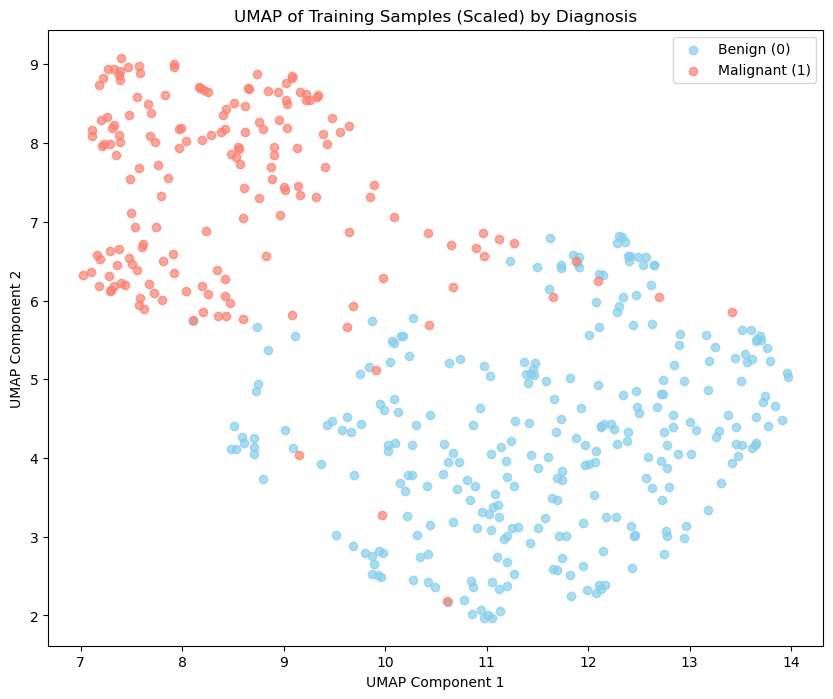

In [19]:

# For UMAP, you'd typically scale the data first
# Make sure you have umap-learn installed: pip install umap-learn
# You can run this in a cell: !pip install umap-learn
try:
    from sklearn.preprocessing import StandardScaler
    from umap import UMAP

    # Scale a copy of X_train for UMAP
    X_train_scaled_for_umap = StandardScaler().fit_transform(X_train)

    reducer = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42, n_jobs=1) # n_jobs=1 for reproducibility
    X_train_umap = reducer.fit_transform(X_train_scaled_for_umap)

    plt.figure(figsize=(10, 8))
    # y_train == 0 is Benign, y_train == 1 is Malignant
    plt.scatter(X_train_umap[y_train==0, 0], X_train_umap[y_train==0, 1], label="Benign (0)", c="skyblue", alpha=0.7)
    plt.scatter(X_train_umap[y_train==1, 0], X_train_umap[y_train==1, 1], label="Malignant (1)", c="salmon", alpha=0.7)
    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")
    plt.title("UMAP of Training Samples (Scaled) by Diagnosis")
    plt.legend()
    plt.show()
except ImportError:
    print("UMAP not installed or an issue occurred. Skipping UMAP plot.")
    print("To install UMAP: !pip install umap-learn (run this in a new code cell if needed)")

## Correlation Analysis on Training Data

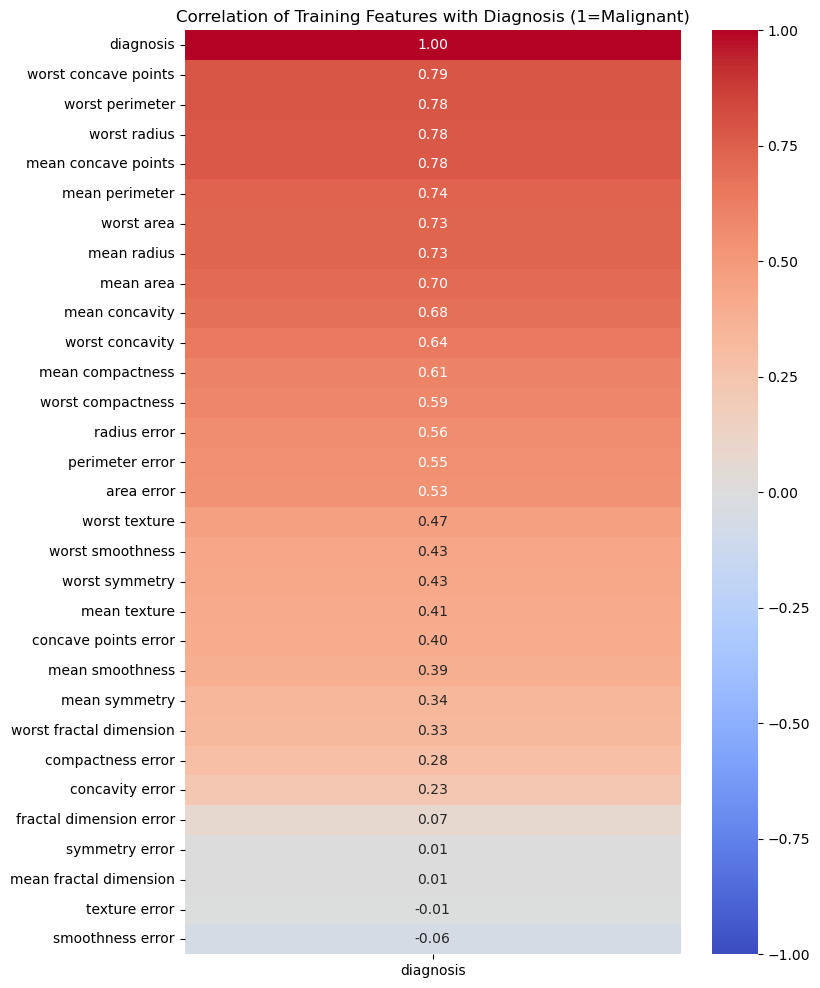


Top Positive Correlations with Diagnosis (Training Data):
diagnosis               1.000000
worst concave points    0.786306
worst perimeter         0.782881
worst radius            0.777602
mean concave points     0.775737
mean perimeter          0.740027
worst area              0.731761
mean radius             0.728160
mean area               0.703893
mean concavity          0.683688
Name: diagnosis, dtype: float64

Top Negative Correlations (actually least positive here):
fractal dimension error    0.070343
symmetry error             0.006430
mean fractal dimension     0.005534
texture error             -0.006663
smoothness error          -0.056654
Name: diagnosis, dtype: float64


In [20]:
# Add diagnosis back to training set (temporarily) for correlation calculation
X_train_with_target = X_train.copy()
X_train_with_target['diagnosis'] = y_train

# Calculate the correlation matrix
corr_matrix_train = X_train_with_target.corr()

# Visualize the correlation of features with the 'diagnosis' column using a heatmap
plt.figure(figsize=(8, 12)) # Adjusted for more features potentially
sns.heatmap(corr_matrix_train[['diagnosis']].sort_values(by='diagnosis', ascending=False), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation of Training Features with Diagnosis (1=Malignant)")
plt.show()

# Print the most correlated features
sorted_corr_train = corr_matrix_train["diagnosis"].sort_values(ascending=False)
print("\nTop Positive Correlations with Diagnosis (Training Data):")
print(sorted_corr_train.head(10))
print("\nTop Negative Correlations (actually least positive here):")
print(sorted_corr_train.tail(5))


Top features selected for PairPlot: ['worst concave points', 'worst perimeter', 'worst radius', 'mean concave points']


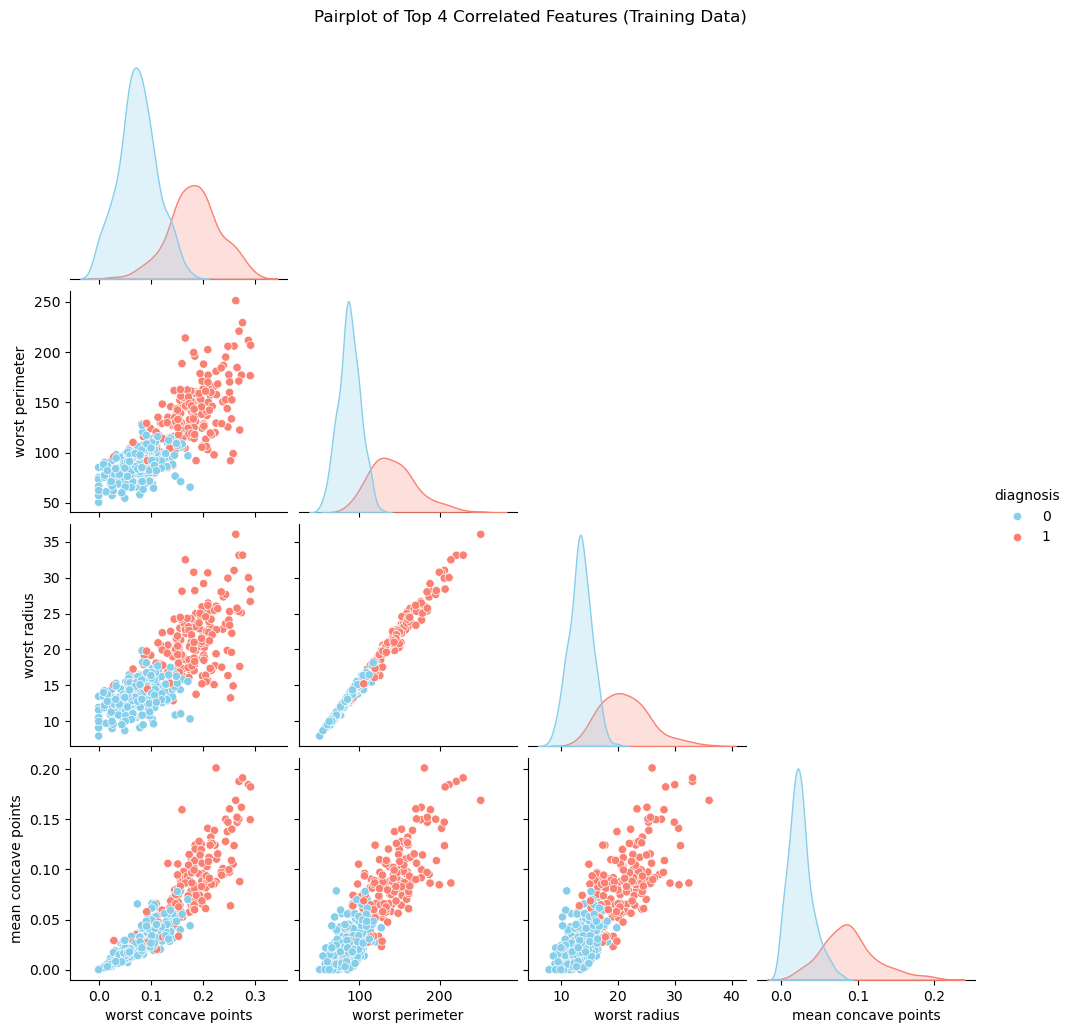

In [21]:
from pandas.plotting import scatter_matrix # Already imported, but good to remember

# Select top features based on correlation with diagnosis (from training data)
# Exclude 'diagnosis' itself from the list of features to plot against each other
top_features_for_pairplot = [f for f in sorted_corr_train.index if f != 'diagnosis'][:4]

print(f"\nTop features selected for PairPlot: {top_features_for_pairplot}")

if top_features_for_pairplot: # Proceed only if features were selected
    # sns.pairplot creates its own figure, so plt.figure might not be needed or could interfere.
    sns.pairplot(X_train_with_target, vars=top_features_for_pairplot, hue='diagnosis',
                 palette={0: 'skyblue', 1: 'salmon'}, corner=True)
    # Adjust title positioning if using sns.pairplot's figure
    plt.gcf().suptitle(f"Pairplot of Top {len(top_features_for_pairplot)} Correlated Features (Training Data)", y=1.03)
    plt.show()
else:
    print("No features selected for pairplot based on correlation, skipping.")

## Box Plots by Diagnosis (Training Data)

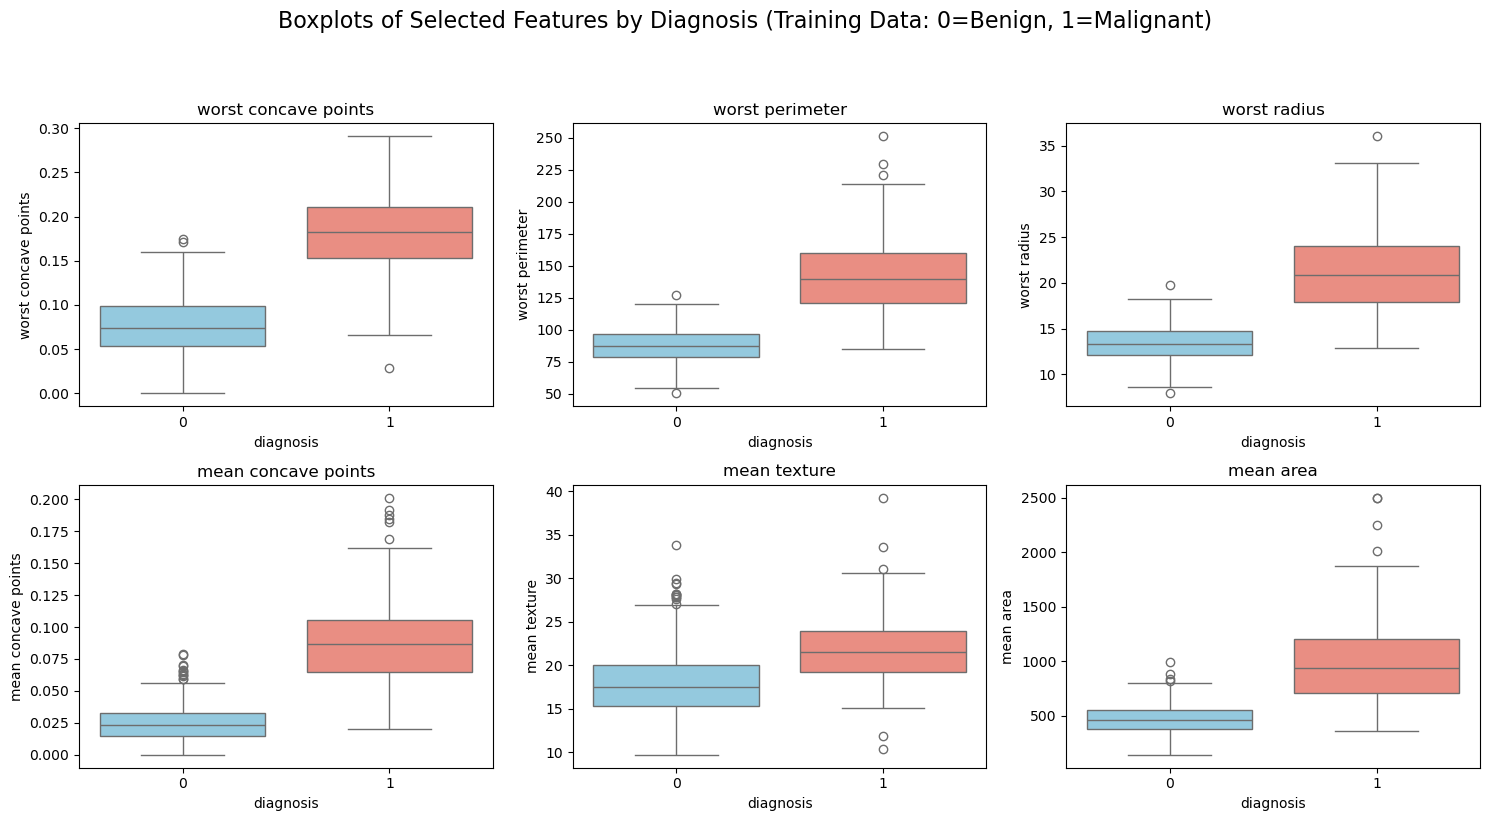

In [22]:
# Select a subset of features for clearer boxplots.
if 'top_features_for_pairplot' in locals() and top_features_for_pairplot and len(top_features_for_pairplot) > 0 :
    # Take distinct features, ensuring they exist in X_train_with_target
    base_features = [f for f in top_features_for_pairplot if f in X_train_with_target.columns]
    additional_features = [f for f in ['mean texture', 'mean area', 'mean smoothness'] if f in X_train_with_target.columns and f not in base_features]
    features_for_boxplot_train = (base_features + additional_features)[:6] # Cap at 6 features for readability
else:
    # Fallback if top_features_for_pairplot wasn't properly defined or is empty
    features_for_boxplot_train = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean concavity']
    features_for_boxplot_train = [f for f in features_for_boxplot_train if f in X_train_with_target.columns][:6] # Ensure they exist and cap

if not features_for_boxplot_train: # Ultimate fallback if list is still empty
    print("Error: No valid features selected for boxplot. Using minimal default example.")
    features_for_boxplot_train = [col for col in ['mean radius', 'mean texture'] if col in X_train_with_target.columns]


n_box_features = len(features_for_boxplot_train)
if n_box_features > 0: # Proceed only if there are features to plot
    n_box_cols = min(3, n_box_features) # Max 3 columns for boxplots
    n_box_rows = (n_box_features + n_box_cols - 1) // n_box_cols # Calculate rows needed

    plt.figure(figsize=(n_box_cols * 5, n_box_rows * 4)) # Setup figure size
    for i, feature in enumerate(features_for_boxplot_train):
        plt.subplot(n_box_rows, n_box_cols, i + 1) # Create subplot for each feature
        # sns.boxplot shows distribution summaries.
        # x='diagnosis' groups data by diagnosis.
        # y=feature specifies the feature to plot.
        # hue='diagnosis' and palette provide coloring. legend=False as x-axis is clear.
        sns.boxplot(x='diagnosis', y=feature, data=X_train_with_target,
                    hue='diagnosis', palette={0: 'skyblue', 1: 'salmon'}, legend=False)
        plt.title(feature) # Title for each subplot

    plt.suptitle("Boxplots of Selected Features by Diagnosis (Training Data: 0=Benign, 1=Malignant)", fontsize=16, y=1.02) # Overall title
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to prevent overlap
    plt.show()
else:
    print("No features available for boxplotting.")
     

#  5. Prepare the Data for Machine Learning Algorithms

## Handling Missing Values (Illustrative)

In [23]:
from sklearn.impute import SimpleImputer # For handling missing values

# Create a temporary copy of X_train and introduce some NaNs for demonstration
X_train_temp_for_imputation = X_train.copy()
# Introduce some NaNs into the 'mean texture' column for the first 5 samples
for i in range(min(5, len(X_train_temp_for_imputation))): # Ensure we don't go out of bounds
    X_train_temp_for_imputation.iloc[i, X_train_temp_for_imputation.columns.get_loc('mean texture')] = np.nan

print("NaNs in 'mean texture' (temp df) before imputation:", X_train_temp_for_imputation['mean texture'].isnull().sum())

# Initialize SimpleImputer with median strategy
imputer = SimpleImputer(strategy="median")

# Fit the imputer ONLY on the column(s) with NaNs from the training data copy
imputer.fit(X_train_temp_for_imputation[['mean texture']])
# Transform the column(s), replacing NaNs with the learned median
X_train_temp_for_imputation['mean texture'] = imputer.transform(X_train_temp_for_imputation[['mean texture']])

print("NaNs in 'mean texture' (temp df) AFTER imputation:", X_train_temp_for_imputation['mean texture'].isnull().sum())
print("First 5 'mean texture' values (temp df) after imputation with median:")
print(X_train_temp_for_imputation['mean texture'].head())
print("\n(End of illustrative imputation. We'll use the original clean X_train going forward.)")
     

NaNs in 'mean texture' (temp df) before imputation: 5
NaNs in 'mean texture' (temp df) AFTER imputation: 0
First 5 'mean texture' values (temp df) after imputation with median:
10     18.89
170    18.89
407    18.89
430    18.89
27     18.89
Name: mean texture, dtype: float64

(End of illustrative imputation. We'll use the original clean X_train going forward.)


## Handling Categorical Attributes (Illustrative)


In [24]:
from sklearn.preprocessing import OneHotEncoder # For converting categorical features to numerical

# Create dummy categorical data for illustration
# Make sure the index aligns if you were to merge this back, using X_train.index
if len(X_train) >= 5:
    X_train_cat_example = pd.DataFrame({'tumor_grade': ['G1', 'G2', 'G3', 'G2', 'G1']},
                                     index=X_train.index[:5])

    # Initialize OneHotEncoder
    # sparse_output=False returns a dense NumPy array.
    # handle_unknown='ignore' makes the encoder robust to new categories in test data.
    cat_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    # Fit and transform the dummy categorical data
    tumor_grade_1hot = cat_encoder.fit_transform(X_train_cat_example[['tumor_grade']])

    print("\nOne-hot encoding example for 'tumor_grade':")
    print(tumor_grade_1hot)
    print(f"Categories found by OneHotEncoder: {cat_encoder.categories_}")
    # get_feature_names_out is the modern way to get output feature names
    print(f"Feature names out from OneHotEncoder: {cat_encoder.get_feature_names_out(['tumor_grade'])}")
else:
    print("\nSkipping illustrative OneHotEncoding as X_train has less than 5 samples.")
print("\n(End of illustrative one-hot encoding.)")


One-hot encoding example for 'tumor_grade':
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Categories found by OneHotEncoder: [array(['G1', 'G2', 'G3'], dtype=object)]
Feature names out from OneHotEncoder: ['tumor_grade_G1' 'tumor_grade_G2' 'tumor_grade_G3']

(End of illustrative one-hot encoding.)


## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler # For standardizing features (mean=0, std=1)
from sklearn.pipeline import Pipeline # For chaining preprocessing steps and models

# We will define the scaler as the first step within each model's pipeline later.
# This ensures that scaling is learned only from training data within cross-validation folds.
# For demonstration, let's apply it to X_train to see its effect.
num_pipeline_example = Pipeline([
    ('std_scaler', StandardScaler()),
])
X_train_prepared_np_example = num_pipeline_example.fit_transform(X_train)

print(f"\nShape of X_train after example scaling: {X_train_prepared_np_example.shape}")
print("A few values from X_train after example scaling (first 2 rows, first 5 cols):")
print(X_train_prepared_np_example[:2, :5])

# Convert back to DataFrame to check mean and std
X_train_prepared_df_example = pd.DataFrame(X_train_prepared_np_example, columns=X_train.columns, index=X_train.index)
print("\nMean of 'mean radius' after example scaling:", X_train_prepared_df_example['mean radius'].mean())
print("Std dev of 'mean radius' after example scaling:", X_train_prepared_df_example['mean radius'].std())
print("\n(Actual scaling will happen inside model pipelines on the fly.)")


Shape of X_train after example scaling: (455, 30)
A few values from X_train after example scaling (first 2 rows, first 5 cols):
[[ 0.51855873  0.89182579  0.4246317   0.38392544 -0.97474371]
 [-0.51636409 -1.63971029 -0.54134872 -0.54296133  0.47621906]]

Mean of 'mean radius' after example scaling: -3.654219783909086e-15
Std dev of 'mean radius' after example scaling: 1.0011007157982694

(Actual scaling will happen inside model pipelines on the fly.)


# 6. Select and Train a Model


## Baseline Model: Logistic Regression


In [26]:
from sklearn.linear_model import LogisticRegression # Logistic Regression classifier
from sklearn.metrics import accuracy_score, roc_auc_score # Evaluation metrics

# Define the pipeline: 1. Scale data, 2. Apply Logistic Regression
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()), # First step: standard scaler
    ("log_reg", LogisticRegression(solver="liblinear", random_state=42)) # Second step: logistic regression model
])
# Fit the pipeline on the training data
log_reg_pipeline.fit(X_train, y_train) # Scaler is fit_transformed on X_train, then model is fit

# Evaluate on the TRAINING set (for an initial feel - cross-validation is more robust)
y_train_pred_log_reg = log_reg_pipeline.predict(X_train) # Predict class labels
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg) # Calculate accuracy
train_probas_log_reg = log_reg_pipeline.predict_proba(X_train)[:, 1] # Probabilities for the positive class (Malignant=1)
train_auc_log_reg = roc_auc_score(y_train, train_probas_log_reg) # Calculate ROC AUC score
print(f"\nLogistic Regression TRAINING accuracy: {train_accuracy_log_reg:.4f}")
print(f"Logistic Regression TRAINING AUC: {train_auc_log_reg:.4f}")


Logistic Regression TRAINING accuracy: 0.9890
Logistic Regression TRAINING AUC: 0.9976


## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
tree_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("tree_clf", DecisionTreeClassifier(random_state=42)) # random_state for reproducibility
])
tree_pipeline.fit(X_train, y_train)

# Evaluate on the TRAINING set
y_train_pred_tree = tree_pipeline.predict(X_train)
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
train_probas_tree = tree_pipeline.predict_proba(X_train)[:, 1]
train_auc_tree = roc_auc_score(y_train, train_probas_tree)
print(f"\nDecision Tree TRAINING accuracy: {train_accuracy_tree:.4f}") # Often 1.0 if unconstrained (overfitting)
print(f"Decision Tree TRAINING AUC: {train_auc_tree:.4f}") # Often 1.0 if unconstrained


Decision Tree TRAINING accuracy: 1.0000
Decision Tree TRAINING AUC: 1.0000


## Better Evaluation Using Cross-Validation


In [28]:
from sklearn.model_selection import cross_val_score # Function for cross-validation

# Cross-validation for Logistic Regression pipeline
# cv=10 means 10-fold cross-validation. scoring="roc_auc" specifies the metric.
log_reg_auc_scores_cv = cross_val_score(log_reg_pipeline, X_train, y_train, cv=10, scoring="roc_auc")
print(f"\nLogistic Regression 10-fold CV AUC scores: {log_reg_auc_scores_cv.round(4)}")
print(f"Mean CV AUC: {log_reg_auc_scores_cv.mean():.4f}, Std CV AUC: {log_reg_auc_scores_cv.std():.4f}")

# Cross-validation for Decision Tree pipeline
tree_auc_scores_cv = cross_val_score(tree_pipeline, X_train, y_train, cv=10, scoring="roc_auc")
print(f"\nDecision Tree 10-fold CV AUC scores: {tree_auc_scores_cv.round(4)}")
print(f"Mean CV AUC: {tree_auc_scores_cv.mean():.4f}, Std CV AUC: {tree_auc_scores_cv.std():.4f}")
# Decision Tree CV score is usually much lower than its training score, indicating overfitting.


Logistic Regression 10-fold CV AUC scores: [1.     1.     1.     1.     0.9736 0.9916 0.9979 1.     0.9895 1.    ]
Mean CV AUC: 0.9953, Std CV AUC: 0.0081

Decision Tree 10-fold CV AUC scores: [0.9655 0.9655 0.9828 0.9361 0.8529 0.8992 0.917  0.9055 0.8225 0.8697]
Mean CV AUC: 0.9117, Std CV AUC: 0.0498


## Random Forest Classifier


In [29]:
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
forest_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("forest_clf", RandomForestClassifier(n_estimators=100, random_state=42)) # n_estimators = number of trees
])
forest_auc_scores_cv = cross_val_score(forest_pipeline, X_train, y_train, cv=10, scoring="roc_auc")
print(f"\nRandom Forest 10-fold CV AUC scores: {forest_auc_scores_cv.round(4)}")
print(f"Mean CV AUC: {forest_auc_scores_cv.mean():.4f}, Std CV AUC: {forest_auc_scores_cv.std():.4f}")
     


Random Forest 10-fold CV AUC scores: [1.     1.     1.     1.     0.9817 0.9653 1.     0.9979 0.9433 0.9958]
Mean CV AUC: 0.9884, Std CV AUC: 0.0185


# 7. Fine-Tune Your Model


In [30]:
from sklearn.model_selection import GridSearchCV # For hyperparameter tuning

# Define the parameter grid for RandomForestClassifier within our pipeline
# Parameters are referred to by 'stepname__parametername'
param_grid_rf = [
    {'forest_clf__n_estimators': [50, 100, 150],        # Number of trees
     'forest_clf__max_features': ['sqrt', 'log2', None], # Max features to consider for a split ('auto' is teofn sqrt)
     'forest_clf__max_depth': [None, 10, 20],           # Max depth of each tree (None=unlimited)
     'forest_clf__min_samples_split': [2, 5, 10]}         # Min samples to split an internal node
]

# Use the same pipeline structure; GridSearchCV will set the parameters
# It's good practice to define it clearly here for the search.
forest_pipeline_for_grid = Pipeline([
    ("scaler", StandardScaler()),
    ("forest_clf", RandomForestClassifier(random_state=42)) # Base model with random_state for forest
])

# Initialize GridSearchCV
# cv=5: 5-fold cross-validation for each parameter combination
# scoring='roc_auc': Evaluate using ROC AUC
# return_train_score=True: Useful for diagnosing overfitting of specific param sets
# verbose=1: Shows progress messages
# n_jobs=-1: Use all available CPU cores to speed up the search
grid_search_rf = GridSearchCV(forest_pipeline_for_grid, param_grid_rf,
                              cv=5, scoring='roc_auc',
                              return_train_score=True, verbose=1, n_jobs=-1)
# Fit GridSearchCV on the training data (this can take some time)
grid_search_rf.fit(X_train, y_train)

print("\nGridSearchCV Best Parameters (Random Forest):")
print(grid_search_rf.best_params_) # The combination of parameters that gave the best CV score
print(f"Best CV AUC score from GridSearchCV: {grid_search_rf.best_score_:.4f}") # The best CV score

# The best_estimator_ attribute holds the pipeline fitted with the best parameters on the whole X_train
best_rf_model_gs = grid_search_rf.best_estimator_
     

Fitting 5 folds for each of 81 candidates, totalling 405 fits

GridSearchCV Best Parameters (Random Forest):
{'forest_clf__max_depth': None, 'forest_clf__max_features': 'log2', 'forest_clf__min_samples_split': 2, 'forest_clf__n_estimators': 50}
Best CV AUC score from GridSearchCV: 0.9924


## (Optional) Randomized Search (RandomizedSearchCV)



In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs_rf = {
    'forest_clf__n_estimators': randint(low=50, high=250),
    'forest_clf__max_features': ['sqrt', 'log2', None],
    'forest_clf__max_depth': randint(low=5, high=35),
    'forest_clf__min_samples_split': randint(low=2, high=11),
    'forest_clf__min_samples_leaf': randint(low=1, high=11)
}

# Using the same forest_pipeline structure
# Set n_jobs=-1 to use all available CPU cores for parallel processing, which can speed things up.
# However, for full reproducibility across different machines/setups, n_jobs=1 might be preferred
# if there are subtle issues with how random states are handled in parallel by underlying libraries.
rnd_search_rf = RandomizedSearchCV(forest_pipeline,
                                   param_distributions=param_distribs_rf,
                                   n_iter=30, # Number of parameter settings that are sampled
                                   cv=5, scoring='roc_auc',
                                   random_state=42, verbose=1, return_train_score=True, n_jobs=-1)
# To run RandomizedSearchCV:
# rnd_search_rf.fit(X_train, y_train)
# print("\nRandomizedSearchCV Best Parameters (Random Forest):")
# print(rnd_search_rf.best_params_)
# print(f"Best CV AUC score from RandomizedSearchCV: {rnd_search_rf.best_score_:.4f}")
# best_rf_model_rs = rnd_search_rf.best_estimator_ # Update best model if you run this

## Analyzing the Best Models and Their Errors


Top 10 Feature Importances (from best Random Forest):
worst radius: 0.1300
worst concave points: 0.1067
mean perimeter: 0.1027
worst area: 0.0861
mean concave points: 0.0674
mean area: 0.0570
area error: 0.0553
mean concavity: 0.0541
mean radius: 0.0526
worst perimeter: 0.0451


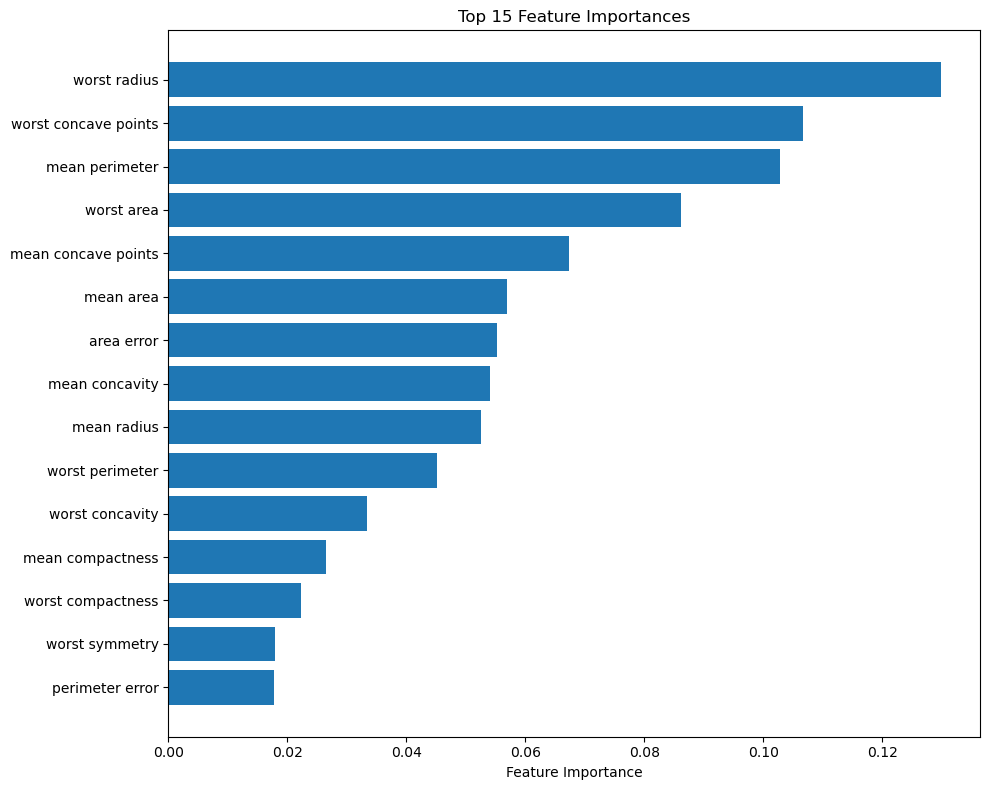

In [33]:
# Let's use the best model from GridSearchCV
final_model_pipeline = best_rf_model_gs # or best_rf_model_rs if you ran RandomizedSearch and it was better

# The RandomForestClassifier is the step named "forest_clf" in our pipeline
final_model_classifier_step = final_model_pipeline.named_steps["forest_clf"]
feature_importances = final_model_classifier_step.feature_importances_

# Get feature names (they are the same as X_train.columns because scaler doesn't change them)
feature_names = X_train.columns

sorted_importances_with_names = sorted(zip(feature_importances, feature_names), reverse=True)

print("\nTop 10 Feature Importances (from best Random Forest):")
for importance, name in sorted_importances_with_names[:10]:
    print(f"{name}: {importance:.4f}")

plt.figure(figsize=(10, 8))
top_n = 15
# Plot horizontal bar chart (easier to read with many features)
# We take top_n and then reverse the list for plotting so the most important is at the top
names_for_plot = [name for imp, name in sorted_importances_with_names[:top_n]][::-1]
importances_for_plot = [imp for imp, name in sorted_importances_with_names[:top_n]][::-1]

plt.barh(names_for_plot, importances_for_plot)
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Feature Importances")
plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()

# 8. Evaluate Your System on the Test Set



Final Model Performance on Test Set:
Test Accuracy: 0.9737
Test AUC: 0.9962

Confusion Matrix on Test Set (TN, FP / FN, TP):
[[72  0]
 [ 3 39]]


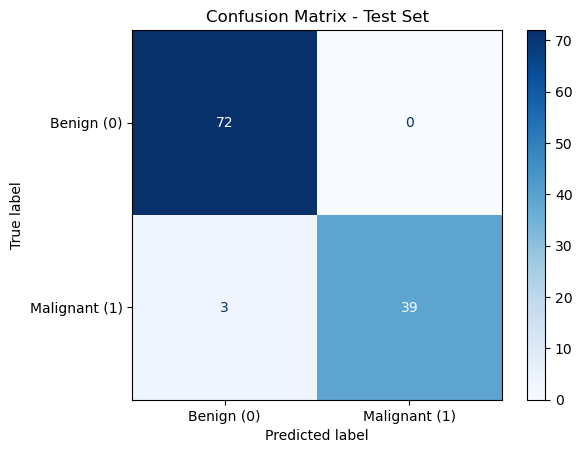

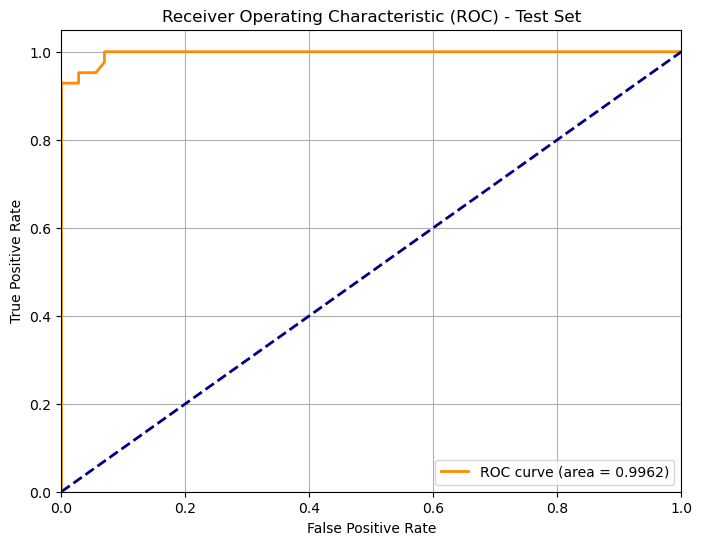

In [34]:
y_test_pred = final_model_pipeline.predict(X_test)
y_test_proba = final_model_pipeline.predict_proba(X_test)[:, 1] # Probabilities for the positive class (Malignant=1)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nFinal Model Performance on Test Set:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# You can also look at a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix on Test Set (TN, FP / FN, TP):")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign (0)', 'Malignant (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

# And plot the ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 9. Launch, Monitor, and Maintain Your System (Briefly)

In [35]:
import joblib

model_filename = "breast_cancer_classification_model.pkl"
joblib.dump(final_model_pipeline, model_filename)
print(f"\nModel saved as {model_filename}")

# To load it later:
# loaded_model = joblib.load(model_filename)
# predictions = loaded_model.predict(new_data)


Model saved as breast_cancer_classification_model.pkl


* Deploy: This could mean wrapping it in a web service, integrating it into lab software, etc.
* Monitor: Continuously check its performance on new data. Monitor for data drift or concept drift. For medical uses, alerts for changes in error rates (especially false negatives) are critical.
* Maintain: Regularly retrain your model on fresh data. Keep backups of datasets and model versions.